In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('D:\Machine Learning\data\Iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### The number of data points (rows). (Hint: check out the dataframe .shape attribute.) The column names. (Hint: check out the dataframe .columns attribute.)The data types for each column. (Hint: check out the dataframe .dtypes attribute.)

In [6]:
df.shape

(150, 5)

In [10]:
df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
df.dtypes.value_counts()

float64    4
object     1
dtype: int64

### Examine the species names and note that they all begin with ‘Iris-’. Remove this portion of thename so the species name is shorter.

In [12]:
df['species']=df.species.str.replace('Iris-','')

In [16]:
df['species'].sample(20)

49         setosa
58     versicolor
98     versicolor
45         setosa
42         setosa
120     virginica
75     versicolor
46         setosa
66     versicolor
41         setosa
92     versicolor
38         setosa
149     virginica
94     versicolor
20         setosa
83     versicolor
108     virginica
145     virginica
48         setosa
139     virginica
Name: species, dtype: object

In [17]:
# alternatively
# df['species'] = df.species.apply(lambda r: r.replace('Iris-', ''))

### The number of each species present. 

In [18]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

### * Themean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.Hint: for the last question, the .describe method does have median, but it’s not called median.It’s the 50% quantile. .describe does not have range though, and in order to get the range, youwill need to create a new entry in the .describe table, which is max - min

In [19]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df=df.describe()
stats_df.loc['range']=stats_df.loc['max']-stats_df.loc['min']
out_fileds= ['mean','25%','50%','75%', 'range']
stats_df=stats_df.loc[out_fileds]
stats_df.rename({'50%':'median'},inplace=True)

In [33]:
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


### Calculate mean,median for each species

 Hint: you may want to use Pandas groupby method to group by species before calculating the
statistic.
If you finish both of these, try calculating both statistics (mean and median) in a single table
(i.e. with a single groupby call). See the section of the Pandas documentation on applying multiple
functions at once for a hint.

### mean

In [34]:
df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### median

In [36]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


### applying multiple functions at once - 2 methods

In [39]:
df.groupby('species').agg(['mean','median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [40]:
import numpy as np

In [42]:
df.groupby('species').agg([np.mean,np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

### Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and givethe plot a title.

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0, 0.5, 'sepal_width(cm)'),
 Text(0.5, 0, 'sepal_lengh(cm)'),
 Text(0.5, 1.0, 'sepal_length vs sepal_width')]

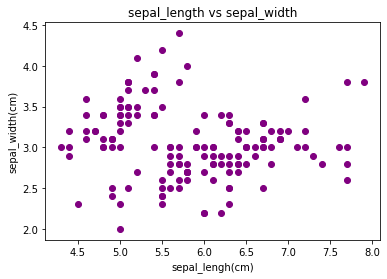

In [48]:
ax=plt.axes()
ax.scatter(df.sepal_length,df.sepal_width,color='purple')
ax.set(xlabel='sepal_lengh(cm)',
            ylabel='sepal_width(cm)',
            title='sepal_length vs sepal_width')

### Make a histogram of any one of the four features. Label axes and title it as appropriate

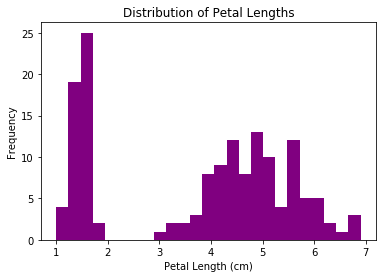

In [56]:
ax=plt.axes()
ax.hist(df.petal_length,bins=25,color='purple')
ax.set(xlabel='Petal Length (cm)',
ylabel='Frequency',
title='Distribution of Petal Lengths');

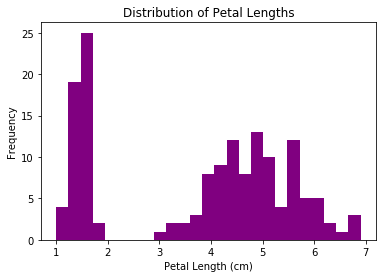

In [59]:
# Alternatively using Pandas plotting functionality
ax=df.petal_length.plot.hist(bins=25,color='purple')
ax.set(xlabel='Petal Length (cm)',
ylabel='Frequency',
title='Distribution of Petal Lengths');

### Now create a single plot with histograms for each feature (petal_width, petal_length,sepal_width, sepal_length) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature

In [60]:
import seaborn as sns

Text(0.5, 0, 'size (cm)')

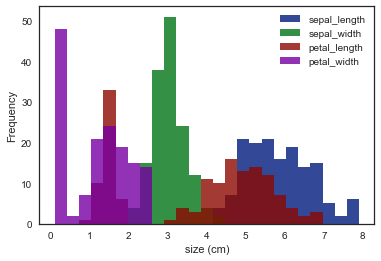

In [92]:
sns.set_context('notebook')
ax=df.plot.hist(bins=25,alpha=0.8)
ax.set_xlabel('size (cm)')

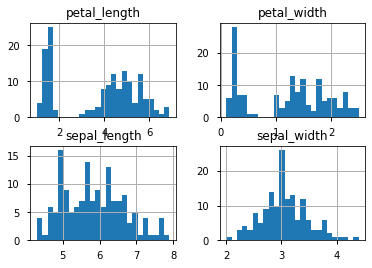

In [70]:
# To create four separate plots, use Pandas `.hist` method
axlist=df.hist(bins=25)


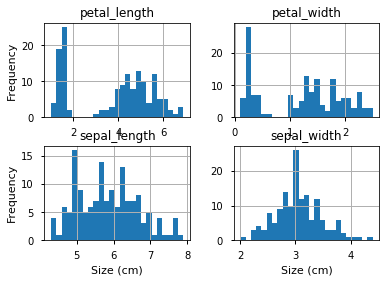

In [67]:
# Add some x- and y- labels to first column and last row
axList=df.hist(bins=25)

for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
    if ax.is_first_col():
        ax.set_ylabel('Frequency')


### Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentationfor Pandas boxplot method.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232157D6438>,
      dtype=object)

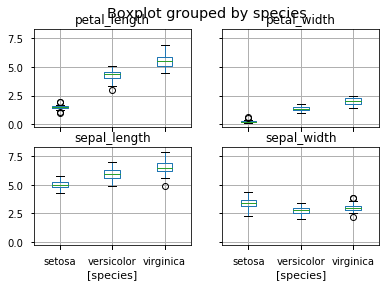

In [73]:
df.boxplot(by='species')

### Now make a single boxplot where the features are separated in the x-axis and species are coloredwith different hues.

In [80]:
plot_data = (df
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0:'size', 'level_1':'measurement'})
)


In [81]:
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


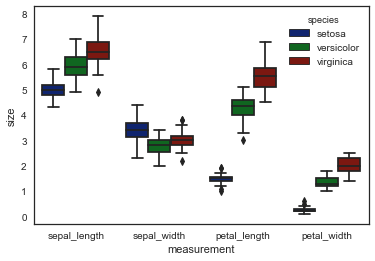

In [84]:
# Now plot the dataframe from above using Seaborn
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
hue='species', data=plot_data);

### Make a pairplot with Seaborn to examine the correlation between each of the measurements.

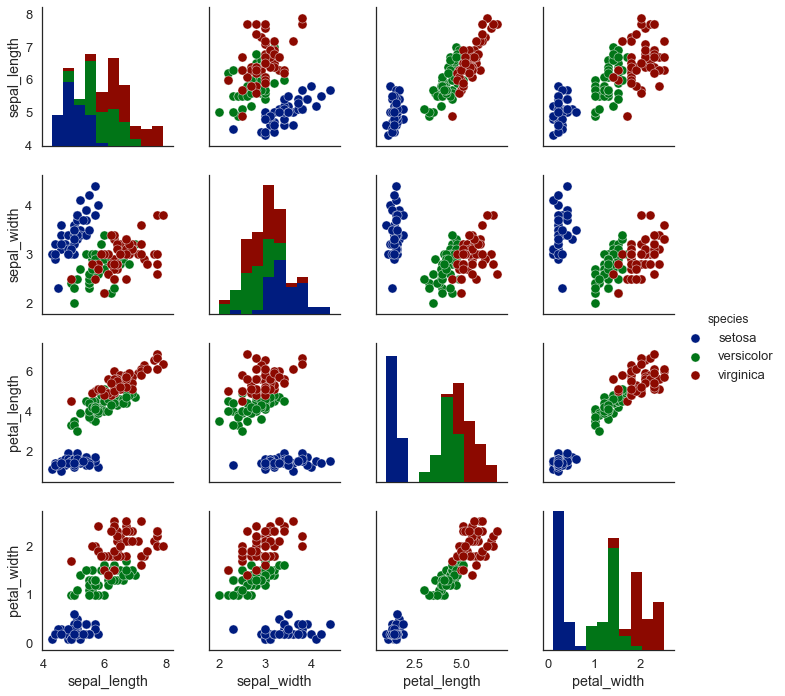

In [88]:
sns.set_context('talk')
sns.pairplot(df, hue='species');